### Import

In [11]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

import sys
sys.path.append("../")
import bayseg
sys.path.append("../tests/")

### Create test data

In [23]:
import create_testing_data
observations, latent_2d = create_testing_data.create_2d_data(100, 100)

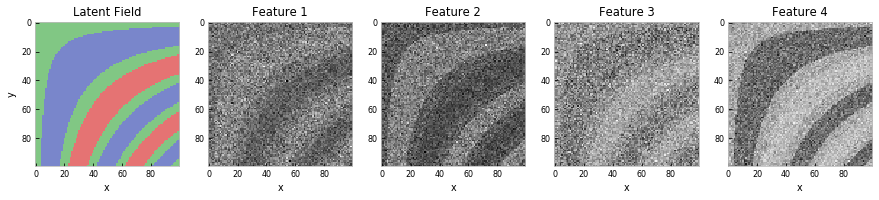

In [24]:
fig, ax = plt.subplots(ncols=5, figsize=(15, 7))
for i in range(4 + 1):
    if i == 0:
        ax[i].imshow(latent_2d, interpolation="nearest", cmap=bayseg.cmap, norm=bayseg.cmap_norm)
        ax[i].set_ylabel("y")
        ax[i].set_title("Latent Field")
    else:
        ax[i].imshow(observations[:, :, i - 1], interpolation="nearest", cmap="gray")
        ax[i].set_title("Feature " + str(i))
    ax[i].grid(False)
    ax[i].set_xlabel("x")

plt.show()

In [11]:
observations.shape

(100, 100, 4)

### Fit

In [25]:
clf = bayseg.BaySeg(observations, 3, beta_init=1)

In [28]:
clf.fit(500, beta_jump_length=0.01, 
        verbose=False, fix_beta=False)

100%|█████████████████████████████████████████████████████████████████████████████| 500/500 [00:44<00:00, 11.33it/s]


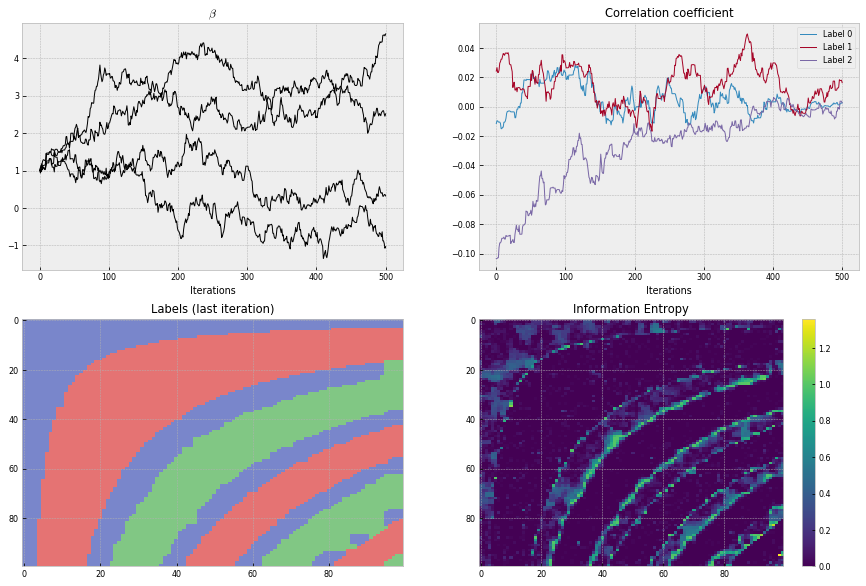

In [27]:
clf.diagnostics_plot()

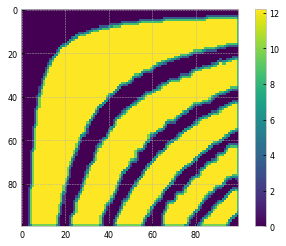

In [8]:
fig = plt.imshow(clf.storage_gibbs_e[-1][:,0].reshape(100,100))
plt.colorbar(fig)

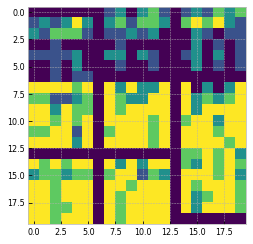

In [16]:
plt.imshow(clf.storage_gibbs_e[-1][:,1].reshape(20,20))

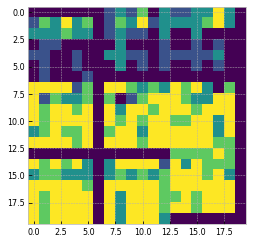

In [19]:
plt.imshow(clf.storage_gibbs_e[-1][:,2].reshape(20,20))

---

# Testing

In [7]:
import pandas as pd

In [8]:
f1 = pd.read_csv("../data/2d_anisotropic_mrf/feature_1", header=None).values
f2 = pd.read_csv("../data/2d_anisotropic_mrf/feature_2", header=None).values

In [9]:
lf = pd.read_csv("../data/2d_anisotropic_mrf/latent_field", header=None).values

In [12]:
obs = np.zeros((2,100,100))

In [13]:
obs[0,:,:] = f1
obs[1,:,:] = f2

In [14]:
obs = obs.T

In [15]:
obs.shape

(100, 100, 2)

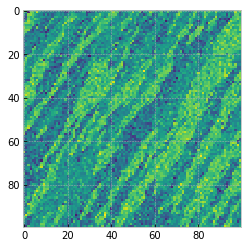

In [16]:
plt.imshow(obs[:,:,0])

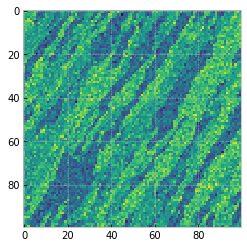

In [17]:
plt.imshow(obs[:,:,1])

In [18]:
clf = bayseg.BaySeg(obs, 3, beta_init=1)

In [21]:
clf.fit(400, beta_jump_length=0.1)

100%|█████████████████████████████████████████████████████████████████████████████| 400/400 [00:29<00:00, 13.72it/s]


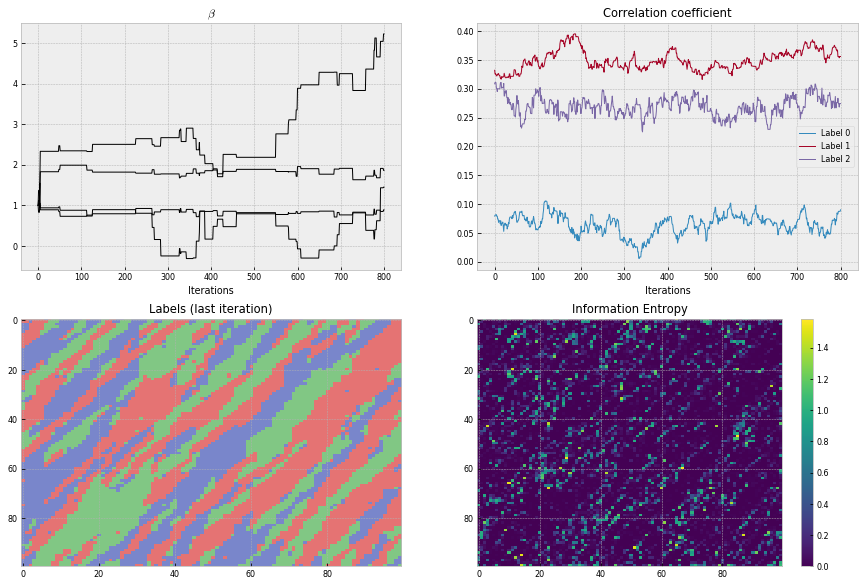

In [22]:
clf.diagnostics_plot()

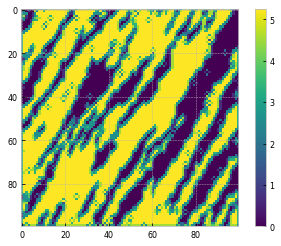

In [51]:
fig = plt.imshow(clf.storage_gibbs_e[-1][:,1].reshape(100,100))
plt.colorbar(fig)

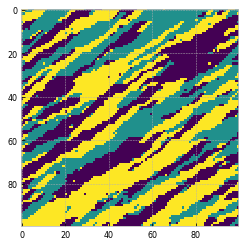

In [44]:
plt.imshow(lf)